In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

CSV to DataFrame

In [56]:
TrainData = pd.read_csv('D:\MNIT\MTech\Assignments\ML\Assignemnt 4\if_not_using_turicreate_use_this\kc_house_data_small_train.csv')
TestData = pd.read_csv('D:\MNIT\MTech\Assignments\ML\Assignemnt 4\if_not_using_turicreate_use_this\kc_house_data_small_test.csv')
ValData = pd.read_csv('D:\MNIT\MTech\Assignments\ML\Assignemnt 4\if_not_using_turicreate_use_this\kc_house_data_validation.csv')

Data Cleaning and Extracting Output/Price

In [57]:
priceVal = ValData['price'].values
priceTrain = TrainData['price'].values
priceTest = TestData['price'].values
columnsToDrop = ["id", "price", "date", "waterfront", "yr_renovated", "zipcode"]
TrainData = TrainData.drop(columns=columnsToDrop)
TestData = TestData.drop(columns=columnsToDrop)
ValData = ValData.drop(columns=columnsToDrop)

Standardization and ndArray Conversion

In [58]:
scaler = StandardScaler()
data_train = scaler.fit_transform(TrainData)
data_test = scaler.transform(TestData)
data_val = scaler.transform(ValData)

Euclidean Distance of Query data to all train data

In [59]:
def alldistances(i, testdata):
    return (np.sqrt(np.sum(np.square(data_train - testdata[i]), axis = 1)))

K Nearest Neighbor

In [60]:
def kNeighbor(k, i, testdata):
    distances = alldistances(i, testdata)
    return distances.argsort()[0:k]

Average Price of K Nearest Neighbor in Train Data

In [61]:
def pricePredicted(k, i, testdata):
    return sum(priceTrain[kNeighbor(k, i, testdata)])/k

Price prediction for all rows in given testdata input

In [62]:
def predict(k, testdata):
    res = []
    for i in range(testdata.shape[0]):
        res.append(pricePredicted(k, i, testdata))
    return np.array(res)

RSS Caluculation for K from 1 to 15

In [63]:
rss_all = []
for i in range(1, 15):
    res = predict(i, data_val)
    rss_all.append(np.sum(np.square(res - priceVal)))

K optimum based on least RSS

In [64]:
K_Optimun = rss_all.index(min(rss_all))+1
print(K_Optimun)

10


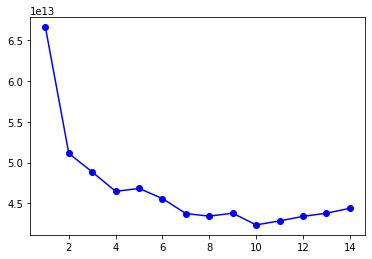

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 15)
plt.plot(kvals, rss_all,'bo-')

In [66]:
print("RSS of test data for Optimal K is", np.sum(np.square(predict(10, data_test) - priceTest)))

RSS of test data for Optimal K is 91794105655272.19


In [67]:
price10 = predict(k=10, testdata=data_test[0:10])
print(price10)
print("Lowest predicted house is", price10.argmin()+1)
print("Lowest predicted price is", np.min(price10))

[900680.  556260.  461527.5 526780.  796133.8 705760.  296590.  391455.7
 277990.  464935. ]
Lowest predicted house is 9
Lowest predicted price is 277990.0
